In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Load dataset
url = 'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv'
data = pd.read_csv(url)

# Display basic information
print(data.info())
print(data.describe())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952

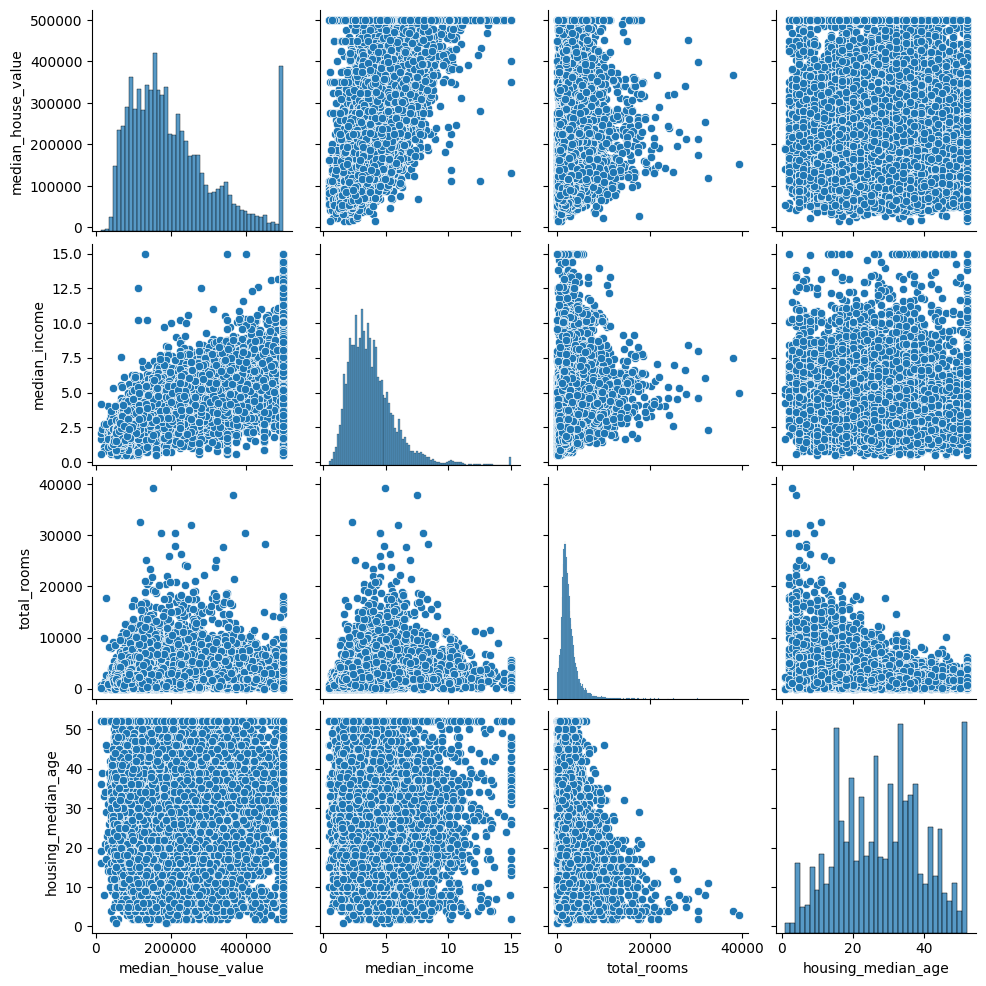

ValueError: could not convert string to float: 'NEAR BAY'

In [2]:
# Pairplot to visualize relationships
sns.pairplot(data[['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']])
plt.show()

# Correlation matrix
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [3]:
# Handle missing values
data = data.dropna()

# Convert categorical variables to numeric
data = pd.get_dummies(data)

# Define features and target
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [4]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [5]:
# Predictions
lr_pred = lr_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# Evaluate Linear Regression
print("Linear Regression:")
print(f"MAE: {mean_absolute_error(y_test, lr_pred)}")
print(f"MSE: {mean_squared_error(y_test, lr_pred)}")
print(f"R²: {r2_score(y_test, lr_pred)}")

# Evaluate Random Forest
print("Random Forest:")
print(f"MAE: {mean_absolute_error(y_test, rf_pred)}")
print(f"MSE: {mean_squared_error(y_test, rf_pred)}")
print(f"R²: {r2_score(y_test, rf_pred)}")


Linear Regression:
MAE: 50413.433308100364
MSE: 4802173538.604162
R²: 0.6488402154431991
Random Forest:
MAE: 31729.61107413751
MSE: 2377306783.767254
R²: 0.826159023345961


In [6]:
# Save the Random Forest model
joblib.dump(rf_model, 'house_price_model.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']